## Preprocess DeepGoPlus data to work with our fairsesq setup

In [1]:
import os, sys
import numpy as np
import pandas as pd
import pickle
import gzip
from scipy.sparse import save_npz, load_npz

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(context='talk', style='ticks',
        color_codes=True, rc={'legend.frameon': False})

# sys.path.append("../../")
from os.path import dirname
curr_dir = os.path.abspath("")
base_dir = dirname(dirname(dirname(curr_dir)))
print(f"base_dir: {base_dir}")
sys.path.append(base_dir)
from go_annotation.ontology import ontology

%matplotlib inline

base_dir: /home/jlaw/projects/2020-01-deepgreen/fairseq-uniparc-fork


In [2]:
print(f"numpy version: {np.__version__}")
print(f"pandas version: {pd.__version__}")
print(f"seaborn version: {sns.__version__}")

numpy version: 1.19.2
pandas version: 1.2.2
seaborn version: 0.11.1


In [17]:
import importlib
importlib.reload(ontology)

<module 'go_annotation.ontology.ontology' from '/home/jlaw/projects/2020-01-deepgreen/fairseq-uniparc-fork/go_annotation/ontology/ontology.py'>

## First explore the deepgoplus data 

In [3]:
data_dir = "/projects/deepgreen/jlaw/inputs/deepgoplus/deepgoplus_data_2016"

In [5]:
train_data = pickle.load(open(f"{data_dir}/train_data.pkl", 'rb'))
train_data

,index,proteins,accessions,sequences,annotations,interpros,orgs
0,225,11K_PAVHV,P0DJZ0;,MQNNTTGMDTKSLKNCGQPKAVCTHCKHSPPCPQPGCVTKRPPVPP...,"[GO:0044217, GO:0043656, GO:0005575, GO:004421...",[],648237
1,240,128UP_DROME,P32234; Q9V648;,MSTILEKISAIESEMARTQKNKATSAHLGLLKAKLAKLRRELISPK...,"[GO:0097367, GO:0043168, GO:0003674, GO:190126...","[IPR031167, IPR031662, IPR006074, IPR006073, I...",7227
2,252,13KDA_SCYCA,P83011;,MIFTAXDRSAIEXV,"[GO:0044464, GO:0043226, GO:0005575, GO:004322...",[],7830
3,253,13KDA_TRISC,P83010;,AGEPANNEDRFNY,"[GO:0044464, GO:0043226, GO:0005575, GO:004322...",[],30494
4,259,140U_DROME,P81928; Q9VFM8;,MNFLWKGRRFLIAGILPTFEGAADEIVDKENKTYKAFLASKPPEET...,"[GO:0032501, GO:0044699, GO:0007275, GO:004470...",[IPR003397],7227
...,...,...,...,...,...,...,...
65023,550268,ZYX_HUMAN,Q15942; A4D2G6; B4DQX7; Q6I9S4;,MAAPRPSPAISVSVSAPAFYAPQKKFGPVVAPKPKVNPFRPGDSEP...,"[GO:0071840, GO:0071560, GO:0070887, GO:000591...",[IPR001781],9606
65024,550269,ZYX_MOUSE,Q62523; P70461; Q3UGQ3;,MAAPRPPPAISVSVSAPAFYAPQKKFAPVVAPKPKVNPFRPGDSEP...,"[GO:0007178, GO:0071560, GO:0070887, GO:007136...",[IPR001781],10090
65025,550270,ZYX_XENLA,A5H447;,MDPAAPATRMTSSFTINISTPSFYNPPKKFAPVVPPKPKINPFKAP...,"[GO:0010467, GO:1901362, GO:0080090, GO:000680...",[IPR001781],8355
65026,550274,ZZZ3_HUMAN,Q8IYH5; B7WPC6; Q6N004; Q6N070; Q8IYP0; Q8IYR1...,MAASRSTRVTRSTVGLNGLDESFCGRTLRNRSIAHPEEISSNSQVR...,"[GO:0044464, GO:0043226, GO:0071840, GO:001604...","[IPR009057, IPR017930, IPR001005, IPR000433]",9606


In [6]:
train_data['orgs'].value_counts()

9606       14160
10090       9898
3702        8333
559292      4929
284812      4559
           ...  
190902         1
104060         1
66188          1
11132          1
1408143        1
Name: orgs, Length: 1598, dtype: int64

In [8]:
test_data = pickle.load(open(f"{data_dir}/test_data.pkl", 'rb'))
test_data

,level_0,index,proteins,accessions,sequences,annotations,interpros,orgs
84,95,617,1B48_HUMAN,P30486; Q29764;,MLVMAPRTVLLLLSAALALTETWAGSHSMRYFYTSVSRPGRGEPRF...,"[GO:0030139, GO:0098576, GO:0030662, GO:003065...","[IPR007110, IPR013783, IPR003006, IPR003597, I...",9606
181,204,1028,3BHS7_MOUSE,Q9EQC1; A2RTR5;,MADSAQVPTLVYLVTGGCGFLGEHIVRMLLEREPRLRELRVFDLHL...,"[GO:0060326, GO:0008152, GO:0030595, GO:007088...","[IPR002225, IPR016040]",10090
183,208,1043,3BP1_MOUSE,P55194; E9QMQ2; Q99KK8;,MAESFKELDPDSSMGKALEMTCAIQNQLARILAEFEMTLERDVLQP...,"[GO:0005515, GO:0005488, GO:0017124, GO:001990...","[IPR027267, IPR004148, IPR008936, IPR000198]",10090
304,394,2418,6PGD_DROME,P41572; Q9W519;,MSGQADIALIGLAVMGQNLILNMDEKGFVVCAYNRTVAKVKEFLAN...,"[GO:0044710, GO:0008152, GO:0010906, GO:004426...","[IPR008927, IPR013328, IPR012284, IPR006114, I...",7227
326,427,2607,8ODP_RAT,P53369;,MSTSRLYTLVLVLQPQRVLLGMKKRGFGAGRWNGFGGKVQEGETIE...,"[GO:0010035, GO:0005622, GO:0061458, GO:004444...","[IPR020476, IPR020084, IPR000086, IPR015797, I...",10116
...,...,...,...,...,...,...,...,...
55732,67106,552113,ZN809_MOUSE,G3X9G7; Q4KL58; Q8BIJ2;,MGLVSFEDVAVDFTLEEWQDLDAAQRTLYRDVMLETYSSLVFLDPC...,"[GO:0019080, GO:0001171, GO:0006351, GO:005079...","[IPR001909, IPR007087, IPR015880, IPR013087]",10090
55751,67125,552243,ZNF8_MOUSE,Q8BGV5; Q52KP6; Q8BJ50;,MDHQDKAATVAMASRPQATQLQEPVTFRDVAVDFTQEEWGQLDPTQ...,"[GO:0010468, GO:0006351, GO:0006725, GO:005078...","[IPR001909, IPR007087, IPR015880, IPR013087]",10090
55763,67138,552282,ZNRF4_HUMAN,Q8WWF5; A8K886; O75866;,MPLCRPEHLMPRASRVPVAASLPLSHAVIPTQLPSRPGHRPPGRPR...,"[GO:0008152, GO:0005622, GO:0044432, GO:000646...","[IPR003137, IPR001841, IPR013083]",9606
55764,67139,552284,ZNRF4_MOUSE,Q9DAH2; Q9WTN2;,MARFAWTRVAPVALVTFWLVLSLSPTDAQVNLSSVDFLDLPALLGV...,"[GO:0005622, GO:0005575, GO:0005623, GO:000573...","[IPR001841, IPR013083]",10090


In [9]:
train_prots = set(list(train_data['proteins']))
test_prots = set(list(test_data['proteins']))
print(f"{len(train_prots)}, {len(test_prots)}, {len(test_prots - train_prots)} unique to test, {len(train_prots - test_prots)} unique to train")

65028, 1788, 1788 unique to test, 65028 unique to train


In [16]:
terms = pickle.load(open(f"{data_dir}/terms.pkl", 'rb'))
terms

,terms
0,GO:0044217
1,GO:0043656
2,GO:0005575
3,GO:0044215
4,GO:0018995
...,...
5096,GO:0000314
5097,GO:0005665
5098,GO:0005839
5099,GO:0004812


In [21]:
# write these terms to file
terms_file = f"{base_dir}/inputs/deepgoplus/terms.csv.gz"
with gzip.open(terms_file, 'w') as out:
    out_str = '\n'.join(sorted(terms['terms'].tolist())) + '\n'
    out.write(out_str.encode())

In [14]:
from collections import defaultdict
# make sure the terms in their file match the terms in the annotations column
all_ann = [a for anns in train_data['annotations'] for a in anns]
term_counts = defaultdict(int)
for t in all_ann:
    term_counts[t] += 1


5038


In [15]:
terms_over_50 = [t for t, count in term_counts.items() if count >= 50]
print(len(terms_over_50))

5101


In [17]:
from collections import defaultdict
# make sure the terms in their file match the terms in the annotations column
all_ann = [a for anns in test_data['annotations'] for a in anns]
term_counts = defaultdict(int)
for t in all_ann:
    term_counts[t] += 1

terms_over_50 = [t for t, count in term_counts.items() if count >= 50]
print(len(terms_over_50))

282


## Setup the fairseq inputs

In [22]:
train_data.head()

,index,proteins,accessions,sequences,annotations,interpros,orgs
0,225,11K_PAVHV,P0DJZ0;,MQNNTTGMDTKSLKNCGQPKAVCTHCKHSPPCPQPGCVTKRPPVPP...,"[GO:0044217, GO:0043656, GO:0005575, GO:004421...",[],648237
1,240,128UP_DROME,P32234; Q9V648;,MSTILEKISAIESEMARTQKNKATSAHLGLLKAKLAKLRRELISPK...,"[GO:0097367, GO:0043168, GO:0003674, GO:190126...","[IPR031167, IPR031662, IPR006074, IPR006073, I...",7227
2,252,13KDA_SCYCA,P83011;,MIFTAXDRSAIEXV,"[GO:0044464, GO:0043226, GO:0005575, GO:004322...",[],7830
3,253,13KDA_TRISC,P83010;,AGEPANNEDRFNY,"[GO:0044464, GO:0043226, GO:0005575, GO:004322...",[],30494
4,259,140U_DROME,P81928; Q9VFM8;,MNFLWKGRRFLIAGILPTFEGAADEIVDKENKTYKAFLASKPPEET...,"[GO:0032501, GO:0044699, GO:0007275, GO:004470...",[IPR003397],7227


In [49]:
def plot_num_ann(ann_mat):
    # plot the number of annotations per term
    num_ann_per_term = np.ravel(ann_mat.sum(axis=0))
    # print(num_ann_per_prot)
    S = pd.Series(num_ann_per_term)
    S[S < 1000].plot.hist(bins=30)
    plt.xlabel("# Annotations per term (< 1000)")
    plt.show()
    plt.close()

In [27]:
df = train_data[['accessions', 'annotations']]
df['accessions'] = df['accessions'].apply(lambda x: x.split(';')[0])
df = df.explode('annotations')
df.columns = ['prot', 'term']
df.head()

/lustre/eaglefs/projects/deepgreen/jlaw/envs/fairseq/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,prot,term
0,P0DJZ0,GO:0044217
0,P0DJZ0,GO:0043656
0,P0DJZ0,GO:0005575
0,P0DJZ0,GO:0044215
0,P0DJZ0,GO:0018995


In [34]:
go_obo_file = f"{base_dir}/inputs/deepgoplus/go.obo.gz"
terms_file = f"{base_dir}/inputs/deepgoplus/terms.csv.gz"
ont_obj = ontology.Ontology(obo_file=go_obo_file)
mapped_terms = ont_obj.map_and_filter_terms(terms)
anc_terms = ont_obj.get_ancestors(mapped_terms)
print(len(anc_terms))

reading obo file: /home/jlaw/projects/2020-01-deepgreen/fairseq-uniparc-fork/inputs/deepgoplus/go.obo.gz
28402 mapped to 28402 terms (0 terms skipped)
28402


In [36]:
# restrict the ontology to the terms with 50 or more anntations with which they evaluated
ont_obj = ontology.Ontology(obo_file=go_obo_file, restrict_terms_file=terms_file)
print(len(ont_obj.terms))

reading obo file: /home/jlaw/projects/2020-01-deepgreen/fairseq-uniparc-fork/inputs/deepgoplus/go.obo.gz
	Reading restrict_terms_file: /home/jlaw/projects/2020-01-deepgreen/fairseq-uniparc-fork/inputs/deepgoplus/terms.csv.gz
5101


In [37]:
# now build the annotation matrix and propagate annotations upward
prots, leaf_ann_mat = ontology.build_ann_matrix(df, ont_obj)
ann_mat = ontology.propagate_ann_up_dag(leaf_ann_mat, ont_obj.dag_matrix.T)

	204875 annotations missed (23301) terms


Text(0.5, 0, '# Annotations per term (< 1000)')

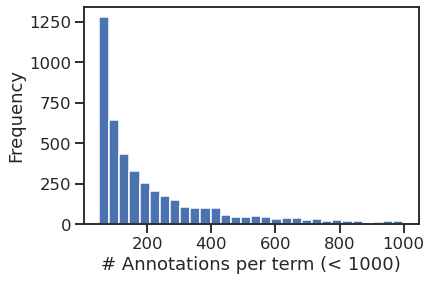

In [41]:
# plot the number of annotations per term
num_ann_per_term = np.ravel(ann_mat.sum(axis=0))
# print(num_ann_per_prot)
S = pd.Series(num_ann_per_term)
S[S < 1000].plot.hist(bins=30)
plt.xlabel("# Annotations per term (< 1000)")
# swissprot_annotated.length.plot.hist(range=(0, 2048), bins=30)

In [43]:
ann_mat.shape

(65015, 5101)

In [44]:
# biological process
ont_obj.terms[num_ann_per_term.argmax()]

'GO:0008150'

In [47]:
train_data.head(2)

,index,proteins,accessions,sequences,annotations,interpros,orgs
0,225,11K_PAVHV,P0DJZ0;,MQNNTTGMDTKSLKNCGQPKAVCTHCKHSPPCPQPGCVTKRPPVPP...,"[GO:0044217, GO:0043656, GO:0005575, GO:004421...",[],648237
1,240,128UP_DROME,P32234; Q9V648;,MSTILEKISAIESEMARTQKNKATSAHLGLLKAKLAKLRRELISPK...,"[GO:0097367, GO:0043168, GO:0003674, GO:190126...","[IPR031167, IPR031662, IPR006074, IPR006073, I...",7227


In [48]:
test_data.head(2)

,level_0,index,proteins,accessions,sequences,annotations,interpros,orgs
84,95,617,1B48_HUMAN,P30486; Q29764;,MLVMAPRTVLLLLSAALALTETWAGSHSMRYFYTSVSRPGRGEPRF...,"[GO:0030139, GO:0098576, GO:0030662, GO:003065...","[IPR007110, IPR013783, IPR003006, IPR003597, I...",9606
181,204,1028,3BHS7_MOUSE,Q9EQC1; A2RTR5;,MADSAQVPTLVYLVTGGCGFLGEHIVRMLLEREPRLRELRVFDLHL...,"[GO:0060326, GO:0008152, GO:0030595, GO:007088...","[IPR002225, IPR016040]",10090


In [ ]:
# for the test and validation set, I'm going to leave all the training data in
# and have the validation set be the deepgoplus test data, since they use a temporal holdout strategy
# e.g., train with data from Jan 2016 and evaluate with data new to Oct 2016.

In [62]:
# since the proteins in the train and test data for deepgoplus are disjoint,
# we can use the same function to build the datasets
def setup_and_write_split(data_df, obo_file, terms_file, out_dir, split='train'):
    df = data_df[['accessions', 'sequences', 'annotations']]
    df['accessions'] = df['accessions'].apply(lambda x: x.split(';')[0])
    df = df.explode('annotations')
    df.columns = ['prot', 'sequence', 'term']
    terms = df['term'].unique()
    print(df.head(3))
    
    ont_obj = ontology.Ontology(obo_file=obo_file)
    mapped_terms = ont_obj.map_and_filter_terms(terms)
    anc_terms = ont_obj.get_ancestors(mapped_terms)
    print(f'{len(anc_terms)} total terms')
    
    # restrict the ontology to the terms with 50 or more anntations with which they evaluated
    ont_obj = ontology.Ontology(obo_file=go_obo_file, restrict_terms_file=terms_file)
    print(f'{len(ont_obj.terms)} after limiting to terms file')
    
    # now build the annotation matrix and propagate annotations upward
    prots, leaf_ann_mat = ontology.build_ann_matrix(df, ont_obj)
    ann_mat = ontology.propagate_ann_up_dag(leaf_ann_mat, ont_obj.dag_matrix.T)
    print(f"{len(ann_mat.data)} total annotations")
    
    print(ann_mat.shape)
    plot_num_ann(ann_mat)
    
    # now write the raw sequence file and the spare annotation matrix
    write_fairseq_files(df, ont_obj, ann_mat, prots, out_dir, split=split)
    return df, ont_obj, ann_mat, prots

/lustre/eaglefs/projects/deepgreen/jlaw/envs/fairseq/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


     prot                                           sequence        term
0  P0DJZ0  MQNNTTGMDTKSLKNCGQPKAVCTHCKHSPPCPQPGCVTKRPPVPP...  GO:0044217
0  P0DJZ0  MQNNTTGMDTKSLKNCGQPKAVCTHCKHSPPCPQPGCVTKRPPVPP...  GO:0043656
0  P0DJZ0  MQNNTTGMDTKSLKNCGQPKAVCTHCKHSPPCPQPGCVTKRPPVPP...  GO:0005575
reading obo file: /home/jlaw/projects/2020-01-deepgreen/fairseq-uniparc-fork/inputs/deepgoplus/go.obo.gz
28402 mapped to 28402 terms (0 terms skipped)
28402 total terms
reading obo file: /home/jlaw/projects/2020-01-deepgreen/fairseq-uniparc-fork/inputs/deepgoplus/go.obo.gz
	Reading restrict_terms_file: /home/jlaw/projects/2020-01-deepgreen/fairseq-uniparc-fork/inputs/deepgoplus/terms.csv.gz
5101 after limiting to terms file
	204875 annotations missed (23301) terms
4039241 total annotations
(65015, 5101)


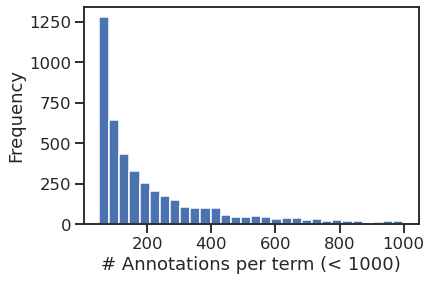

writing 65015 prot sequences to /projects/deepgreen/jlaw/swissprot_go_annotation/2021_06_fairseq_deepgoplus/input0/train.raw
/projects/deepgreen/jlaw/swissprot_go_annotation/2021_06_fairseq_deepgoplus/input0/train-ids.txt
(65015, 5101)
writing /projects/deepgreen/jlaw/swissprot_go_annotation/2021_06_fairseq_deepgoplus/label/train.npz


In [64]:
base_out_dir = "/projects/deepgreen/jlaw/swissprot_go_annotation/2021_06_fairseq_deepgoplus"
df, ont_obj, ann_mat, prots = setup_and_write_split(train_data, go_obo_file, terms_file, base_out_dir, split='train')

/lustre/eaglefs/projects/deepgreen/jlaw/envs/fairseq/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


      prot                                           sequence        term
84  P30486  MLVMAPRTVLLLLSAALALTETWAGSHSMRYFYTSVSRPGRGEPRF...  GO:0030139
84  P30486  MLVMAPRTVLLLLSAALALTETWAGSHSMRYFYTSVSRPGRGEPRF...  GO:0098576
84  P30486  MLVMAPRTVLLLLSAALALTETWAGSHSMRYFYTSVSRPGRGEPRF...  GO:0030662
reading obo file: /home/jlaw/projects/2020-01-deepgreen/fairseq-uniparc-fork/inputs/deepgoplus/go.obo.gz
6818 mapped to 6817 terms (1 terms skipped)
6817 total terms
reading obo file: /home/jlaw/projects/2020-01-deepgreen/fairseq-uniparc-fork/inputs/deepgoplus/go.obo.gz
	Reading restrict_terms_file: /home/jlaw/projects/2020-01-deepgreen/fairseq-uniparc-fork/inputs/deepgoplus/terms.csv.gz
5101 after limiting to terms file
	4091 annotations missed (2763) terms
80894 total annotations
(1786, 5101)


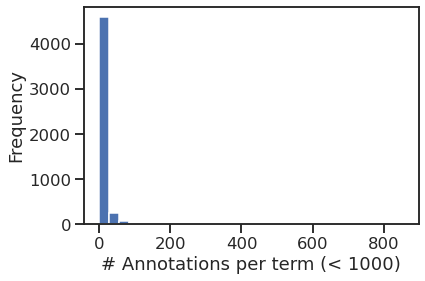

writing 1786 prot sequences to /projects/deepgreen/jlaw/swissprot_go_annotation/2021_06_fairseq_deepgoplus/input0/valid.raw
/projects/deepgreen/jlaw/swissprot_go_annotation/2021_06_fairseq_deepgoplus/input0/valid-ids.txt
(1786, 5101)
writing /projects/deepgreen/jlaw/swissprot_go_annotation/2021_06_fairseq_deepgoplus/label/valid.npz


In [65]:
df, ont_obj, ann_mat, prots = setup_and_write_split(test_data, go_obo_file, terms_file, base_out_dir, split='valid')

In [61]:
def write_fairseq_files(df, ont_obj, ann_mat, prots, base_out_dir, split='train'):
    out_dir = f"{base_out_dir}/input0"
    out_file = f"{out_dir}/{split}.raw"
    os.makedirs(os.path.dirname(out_file), exist_ok=True)
    sequences = dict(zip(df['prot'], df['sequence']))
    
    write_split_prots(prots, sequences, out_file)
    # also write the uniprot IDs to keep track of which proteins are in each set
    out_file = f"{out_dir}/{split}-ids.txt"
    print(out_file)
    pd.Series(prots).to_csv(out_file, index=None, header=None)
    
    out_dir = f"{base_out_dir}/label"
    os.makedirs(out_dir, exist_ok=True)

    print(ann_mat.shape)
    out_file = f"{out_dir}/{split}.npz"
    print(f"writing {out_file}")
    save_npz(out_file, ann_mat)

def write_split_prots(prot_split, sequences, out_file):
    print(f"writing {len(prot_split)} prot sequences to {out_file}")
    with open(out_file, 'w') as out:
        for prot in prot_split:
            out.write(' '.join(sequences[prot]) + '\n')

In [61]:
print(f"# annotations in each group; train: {len(df[df['prot'].isin(train)])}, valid: {len(df[df['prot'].isin(valid)])}, test: {len(df[df['prot'].isin(test)])}")

# annotations in each group; train: 1096839, valid: 62466, test: 62867


In [ ]:
# plot the protein sizes
S[S < 2500].hist()
plt.xlabel("Protein Length (< 2500)")
plt.ylabel("Frequency")


In [75]:
len(S[S > 768]) / len(S)

0.1867632345904563

In [76]:
print(len(prots))

137934


In [81]:
os.chdir(base_out_dir)

In [82]:
# command I used: 
!fairseq-preprocess \
    --trainpref ./input0/train.raw \
    --validpref ./input0/valid.raw \
    --destdir ./input0/ \
    --only-source

Error: mkl-service + Intel(R) MKL: MKL_THREADING_LAYER=INTEL is incompatible with libgomp.so.1 library.
	Try to import numpy first or set the threading layer accordingly. Set MKL_SERVICE_FORCE_INTEL to force it.
